# Get data

In [1]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv('data.csv')

In [2]:
raw_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# raw_df.info()

raw_df.drop(columns=['Unnamed: 32'], inplace=True)

# raw_df.isna().sum()
raw_df.isna().sum().sum()

0

# Analyze data

In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#take note of this line

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Lines magics can return results and can be used in the right hand side of an assignment. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

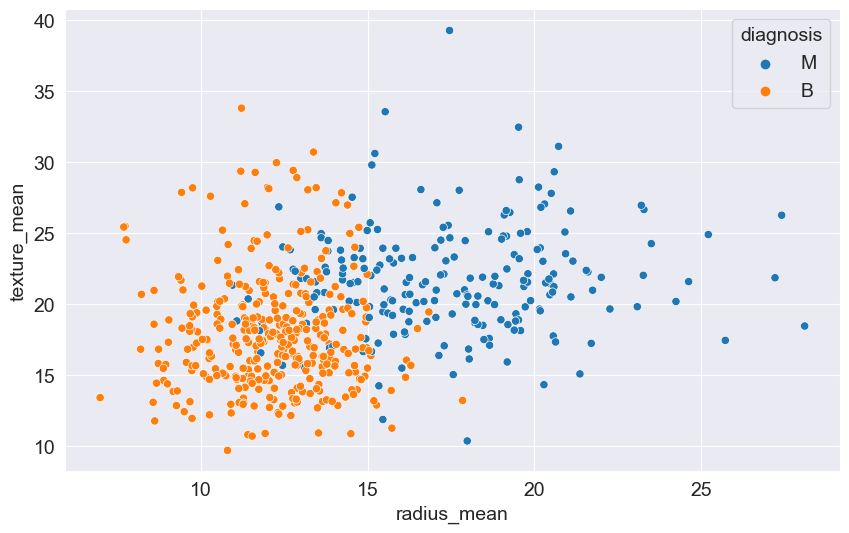

In [10]:
raw_df_columns = list(raw_df.columns)
sns.scatterplot(x=raw_df_columns[2], y=raw_df_columns[3], hue='diagnosis', data=raw_df)

<AxesSubplot:xlabel='perimeter_mean', ylabel='Count'>

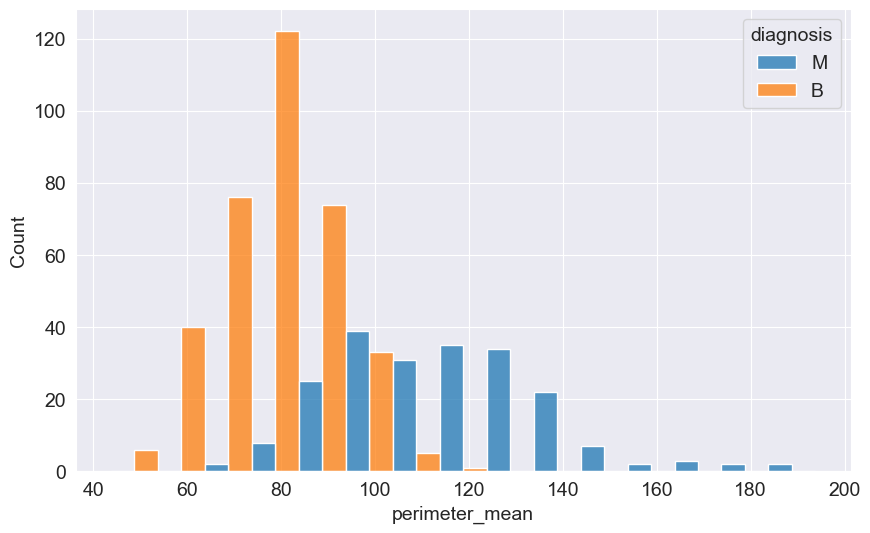

In [6]:
# px.histogram(raw_df, 
#             x=raw_df_columns[3],
#             color='diagnosis', 
#             title='Testing')

sns.histplot(data=raw_df, x=raw_df_columns[4], hue='diagnosis', binwidth=10, multiple='dodge')

# Process data

In [16]:
import sklearn

from sklearn.model_selection import train_test_split

train_and_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_and_val_df, test_size=0.25, random_state=7)

print('train_df.shape :', train_df.shape)
# print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (341, 32)
test_df.shape : (114, 32)


https://en.wikipedia.org/wiki/42_(number)#Popular_culture lol

In [17]:
input_cols = raw_df_columns[2:]
target_col = 'diagnosis'

In [34]:
# Let do some practice here haha:
# Lol, not worked out yet - 16 Dec

# train_inputs, train_targets, val_inputs, val_targets, test_inputs, test_targets = ([] for i in range(6))
# split_list = [train_inputs, train_targets, val_inputs, val_targets, test_inputs, test_targets]
# data_list = [train_df, val_df, test_df]
# data_list_idx = -1

# for idx, df in enumerate(split_list):
#     if (idx % 2 == 0):
#         data_list_idx += 1
#         # print(data_list_idx)
#         # print(f'index: {idx}')
#         # print(split_list[idx])
#         split_list[idx] = data_list[data_list_idx][input_cols].copy()
#         # print(df)
#         # print(split_list[idx])
#     else:
#         split_list[idx] = data_list[data_list_idx][target_col].copy()
#         # print(df)

# print(train_inputs)   

In [49]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

# train_inputs

In [46]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)  
# train_inputs.info()
''' All data is numeric!'''
# train_inputs.describe()

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(raw_df[input_cols])
train_inputs[input_cols] = scaler.transform(train_inputs[input_cols])
val_inputs[input_cols] = scaler.transform(val_inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

Some note here for MinMaxscaler:
- need column "indexing", or else it will return as ndarry lol
- fit() --> The data used to compute the per-feature minimum and maximum used for later scaling along the features axis.
- maybe can be shorter?

In [53]:
train_inputs.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,0.337180,0.326335,0.331445,0.215943,0.384888,0.254449,0.201844,0.233867,0.374684,0.264787,0.105481,0.187677,0.099438,0.061663,0.179771,0.175729,0.081468,0.224414,0.176355,0.100836,0.295729,0.365498,0.282336,0.169969,0.395452,0.217643,0.215959,0.388052,0.260203,0.188600
std,0.166152,0.142092,0.166668,0.147912,0.120153,0.153363,0.174658,0.180770,0.132888,0.138204,0.098286,0.119819,0.093627,0.080553,0.105507,0.141474,0.072749,0.114126,0.110717,0.091197,0.169229,0.158162,0.163599,0.135419,0.149602,0.148210,0.164613,0.218378,0.117553,0.115357
min,0.033603,0.022658,0.028540,0.011410,0.000000,0.000000,0.000000,0.000000,0.054040,0.000000,0.000000,0.000000,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026610,0.022655,0.020320,0.009438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223816,0.226581,0.217469,0.117413,0.300984,0.132507,0.069494,0.103777,0.279798,0.162595,0.045989,0.108734,0.045093,0.021830,0.114186,0.083726,0.038232,0.150710,0.103253,0.045679,0.182142,0.252932,0.169580,0.081277,0.284818,0.113427,0.093211,0.223299,0.181944,0.107766
50%,0.302381,0.306392,0.292378,0.173913,0.373928,0.223299,0.144822,0.162972,0.367677,0.249579,0.077349,0.165267,0.073175,0.034363,0.160417,0.136900,0.065303,0.210078,0.152220,0.082680,0.252579,0.353145,0.236815,0.125959,0.389157,0.183475,0.180831,0.340550,0.249162,0.163977
75%,0.403190,0.401759,0.406399,0.260912,0.463754,0.340838,0.298032,0.341600,0.451515,0.338037,0.128879,0.241292,0.120388,0.064827,0.215896,0.223871,0.104949,0.280167,0.210193,0.125071,0.362860,0.476279,0.363514,0.205417,0.489533,0.300579,0.301837,0.540550,0.313424,0.241572
max,1.000000,1.000000,1.000000,0.999152,0.831182,0.819950,1.000000,1.000000,0.850000,0.839090,1.000000,1.000000,1.000000,0.968995,1.000000,1.000000,0.767172,0.774768,0.753898,0.758855,0.896122,0.889925,0.848598,0.744888,0.972264,0.883478,1.000000,0.997595,0.787108,0.613669


# Save to disk (optional)

In [55]:
# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

In [60]:
'''Testing if saved properly'''

# train_inputs_test = pd.read_parquet('train_inputs.parquet')
# val_inputs_test = pd.read_parquet('val_inputs.parquet')
# test_inputs_test = pd.read_parquet('test_inputs.parquet')
# print(train_inputs_test)

# To get SERIES
# train_targets_test = pd.read_parquet('train_targets.parquet')[target_col]
# val_targets_test = pd.read_parquet('val_targets.parquet')[target_col]
# test_targets_test = pd.read_parquet('test_targets.parquet')[target_col]
# print(type(val_targets_test))

<class 'pandas.core.series.Series'>


Series = 1 column --> make up to DataFrame

# Finally, training time - magic time lol

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import joblib

# Fit training data
model = LogisticRegression(solver='liblinear')
model.fit(train_inputs, train_targets)




0.9648093841642229

accuracy: 0.9648093841642229
accuracy: 0.9649122807017544


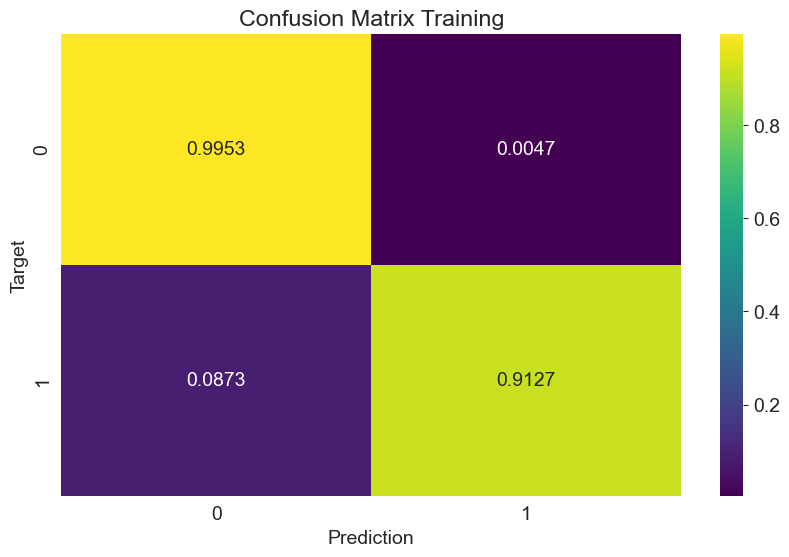

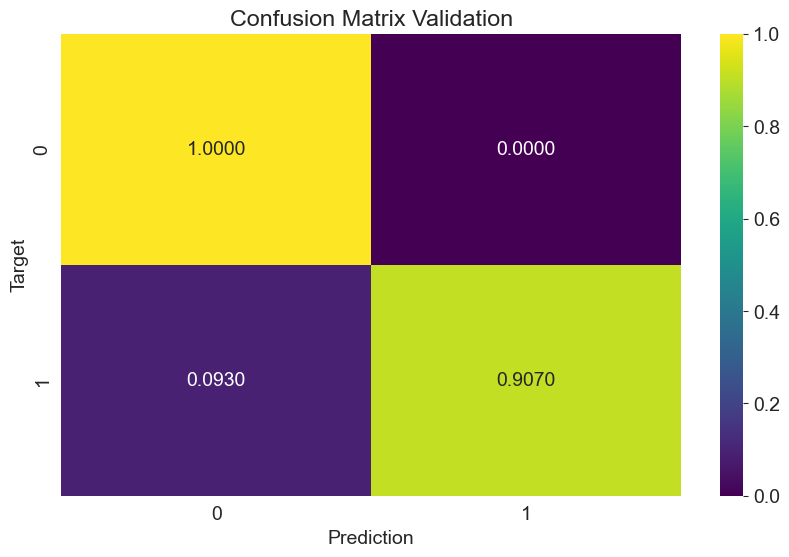

In [91]:
def predict_matrix(train_data, train_targets, data_name ='', cf_normalize='true'):
    '''Prediction'''
    train_preds = model.predict(train_data)
    train_probs = model.predict_proba(train_data)
    print(f"accuracy: {accuracy_score(train_targets, train_preds)}")
    # print(f"probability: {train_probs}")

    '''Plot'''
    cm = confusion_matrix(train_targets, train_preds, normalize=cf_normalize)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='.4f', cmap='viridis')
    plt.xlabel('Prediction'); plt.ylabel('Target')
    plt.title(f'Confusion Matrix {data_name}')

    return train_preds

train_predictions = predict_matrix(train_inputs, train_targets, 'Training')
val_predictions = predict_matrix(val_inputs, val_targets, 'Validation')

My observation:
- CF_MATRIX: normalize true --> around the true value
- Without plt.figure () new plot will over-stack

accuracy: 0.9649122807017544


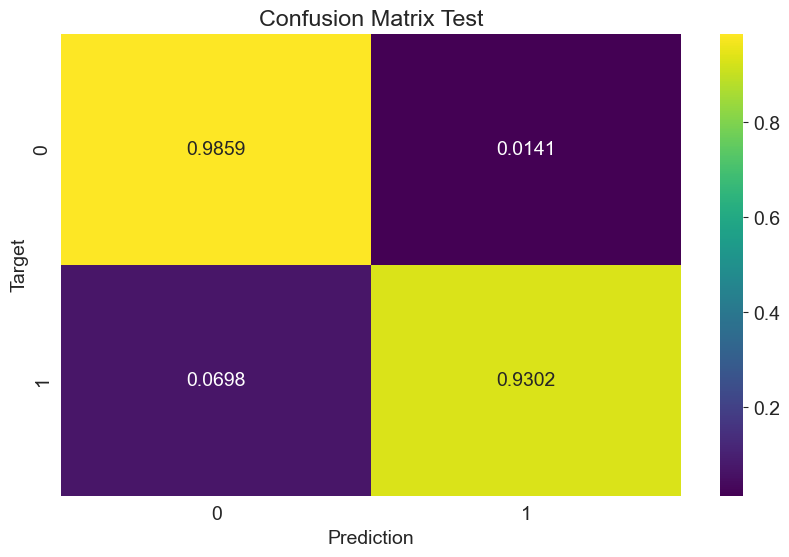

In [92]:
test_preds = predict_matrix(test_inputs, test_targets, 'Test')

In [97]:
'''How reliable is this model? :)'''

def random_guess(inputs):
    return np.random.choice(["M", "B"], len(inputs))

def one_guess(inputs):
    return np.full(len(inputs), "M")

print(accuracy_score(test_targets, random_guess(test_inputs)))
print(accuracy_score(test_targets, one_guess(test_inputs)))

0.5701754385964912
0.37719298245614036


# Save models using JOBLIB

In [98]:
# Save the trained model & load it back
cancer_diag = {
    'model': model, 
    'scaler': scaler, 
    'input_cols': input_cols, 
    'target_col': target_col
}
joblib.dump(cancer_diag, 'cancer_diag_proj_1.joblib')

['cancer_diag_proj_1.joblib']

In [99]:
cancer_diag_test = joblib.load('cancer_diag_proj_1.joblib')

# Final step is to create single/multi input and have fun!